# Portfolio assignment week 6

## 1. Decision Trees and Naive bayes

The scikit-learn library provides different parameters for decision trees and naive bayes.

Based on the last code example in the accompanying notebook, add several new models to the classifiers variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.



In [18]:
from sklearn.datasets import make_moons, make_circles
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay 
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


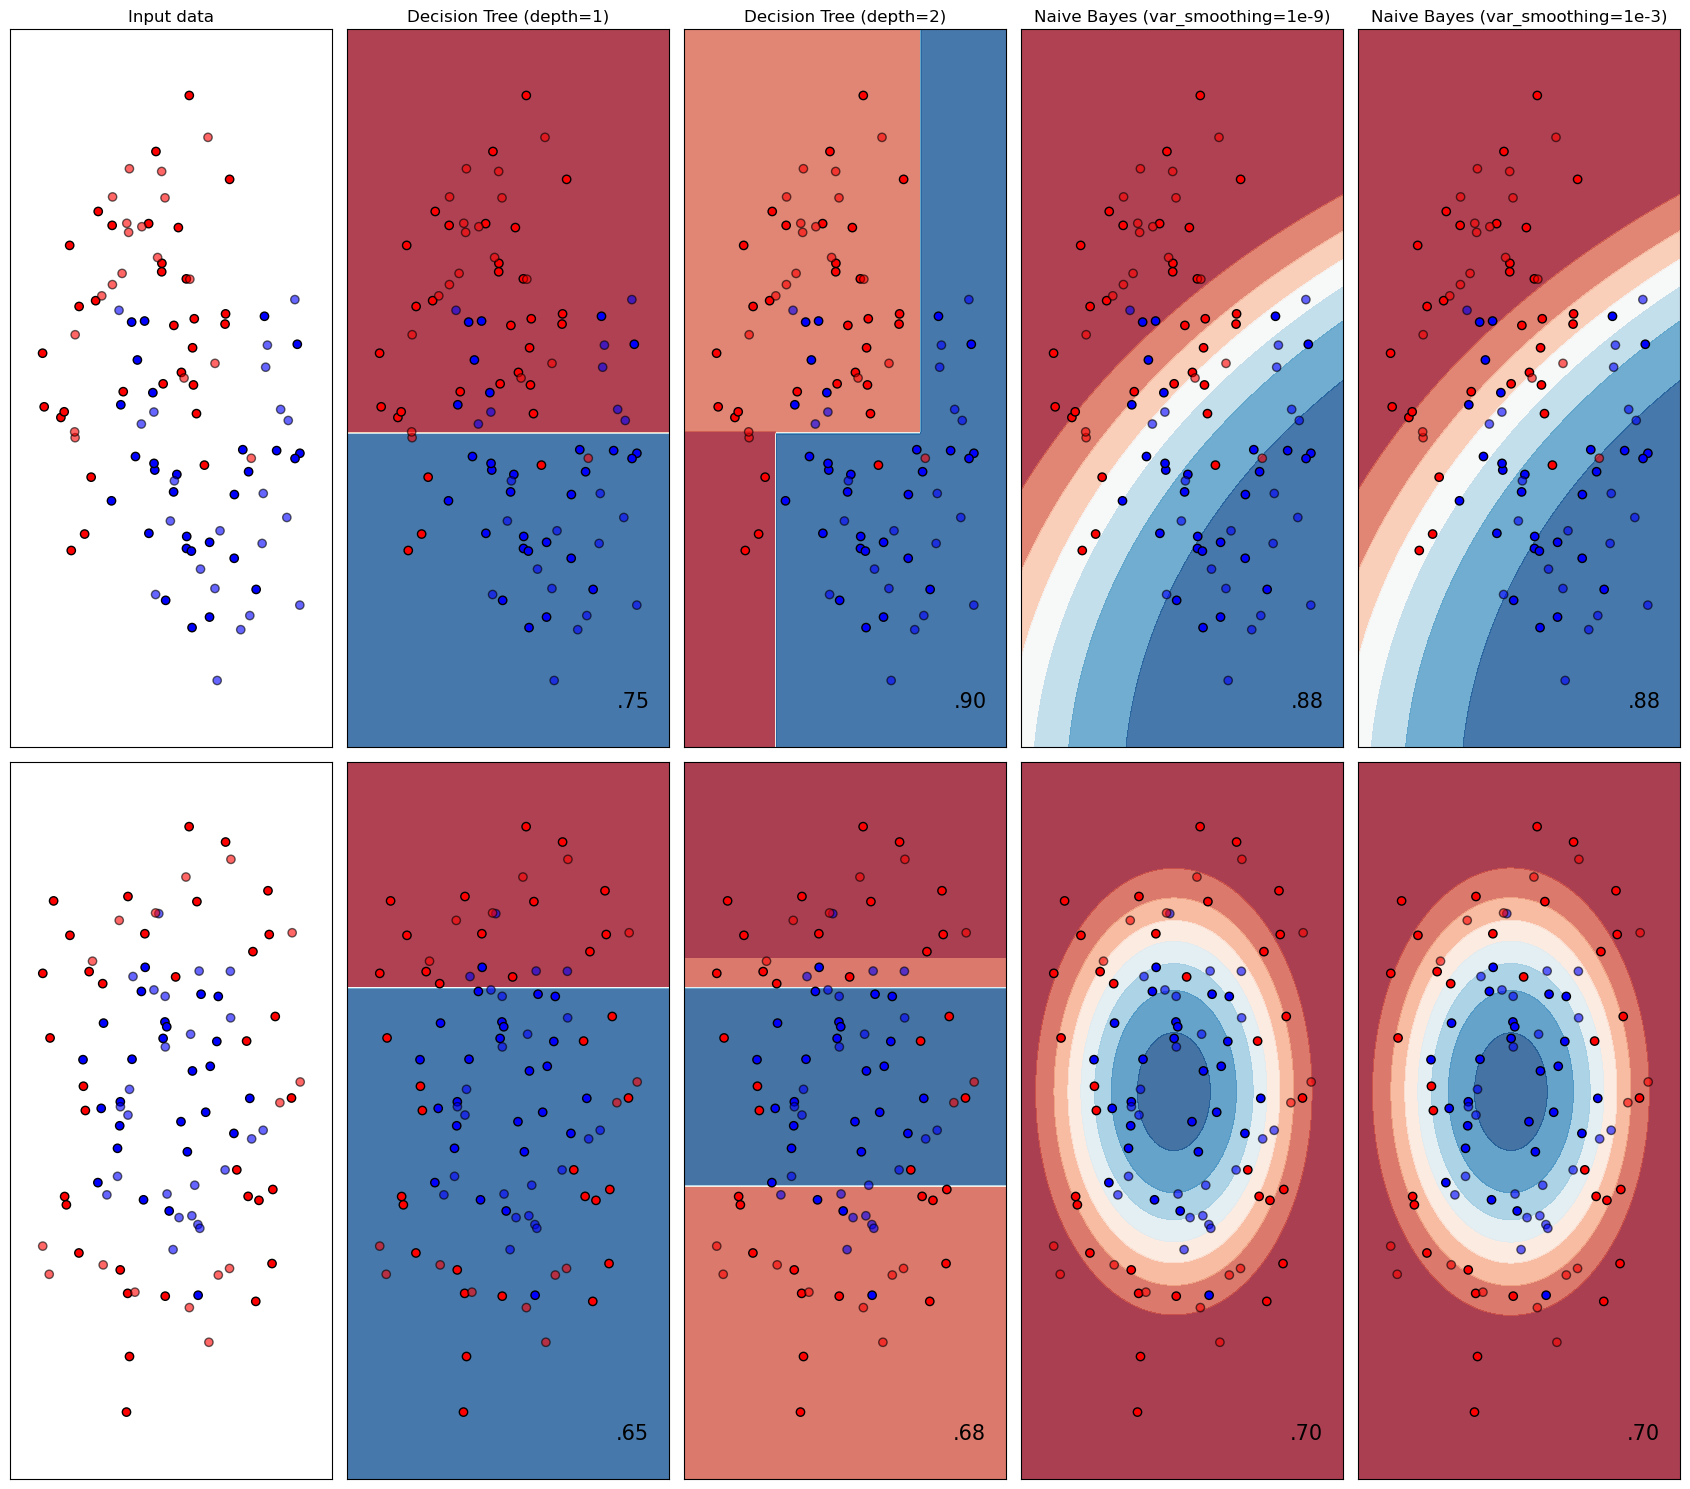

In [14]:

datasets = [make_moons(noise=0.3, random_state=0), 
            make_circles(noise=0.2, factor=0.5, random_state=1)]
names = ['Decision Tree (depth=1)', 'Decision Tree (depth=2)', 'Naive Bayes (var_smoothing=1e-9)', 'Naive Bayes (var_smoothing=1e-3)']
classifiers = [DecisionTreeClassifier(max_depth=1), 
               DecisionTreeClassifier(max_depth=2), 
               GaussianNB(var_smoothing=1e-9),
               GaussianNB(var_smoothing=1e-3)]

figure = plt.figure(figsize=(17, 15))
h = .02  # step size in the mesh

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
plt.subplots_adjust(top=0.90) # Adjust the top margin

plt.tight_layout()
plt.show()


## 2. Decision Tree Evaluation

As shown in the in the accompanying notebook it is possible to visualize the decision tree.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the breast cancer dataset which you can find on assemblix2019 (/data/datasets/DS3/). Go through the data science pipeline as you've done before:

Try to understand the dataset globally.

Load the data.

Exploratory analysis

Preprocess data (skewness, normality, etc.)

Modeling (cross-validation and training)

Evaluation

Explanation

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made?



This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.
Dowloaded from:
Rubini,L., Soundarapandian,P., and Eswaran,P.. (2015). Chronic_Kidney_Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C5G020.
We use 24 + class = 25 ( 11  numeric ,14  nominal)

The dataset comprises 24 predictor features and 1 target feature (class), making it a total of 25 features.

These features are a mix of numeric and nominal (categorical) variables.

Age: Age of the patient in years. It's a numerical feature.

Blood Pressure: Blood pressure of the patient in mm/Hg. It's a numerical feature.

Specific Gravity: Specific gravity of the urine, a test to check the kidney's ability to filter substances. It's a nominal feature with values (1.005,1.010,1.015,1.020,1.025).

Albumin: Albumin level in urine. Albumin is a protein that can indicate kidney damage if present in urine. It's a nominal feature with values ranging from 0 to 5.

Sugar: Sugar level in urine. It's a nominal feature with values ranging from 0 to 5.

Red Blood Cells: Red blood cell count, categorized as normal or abnormal. It's a nominal feature.

Pus Cell: Presence of pus cells, categorized as normal or abnormal. It's a nominal feature.

Pus Cell clumps: Presence of pus cell clumps, categorized as present or not present. It's a nominal feature.

Bacteria: Presence of bacteria, categorized as present or not present. It's a nominal feature.

Blood Glucose Random: Random blood glucose level in mgs/dl. It's a numerical feature.

Blood Urea: Blood urea nitrogen level in mgs/dl. It's a numerical feature.

Serum Creatinine: Serum Creatinine level in mgs/dl. It's a numerical feature.

Sodium: Sodium level in mEq/L. It's a numerical feature.

Potassium: Potassium level in mEq/L. It's a numerical feature.

Hemoglobin: Hemoglobin level in gms. It's a numerical feature.

Packed Cell Volume: The percentage of blood volume that is occupied by red blood cells. It's a numerical feature.

White Blood Cell Count: White blood cell count in cells/cumm. It's a numerical feature.

Red Blood Cell Count: Red blood cell count in millions/cmm. It's a numerical feature.

Hypertension: Presence of hypertension, categorized as yes or no. It's a nominal feature.

Diabetes Mellitus: Presence of diabetes mellitus, categorized as yes or no. It's a nominal feature.

Coronary Artery Disease: Presence of coronary artery disease, categorized as yes or no. It's a nominal feature.

Appetite: Patient's appetite, categorized as good or poor. It's a nominal feature.

Pedal Edema: Presence of pedal edema (swelling in the feet), categorized as yes or no. It's a nominal feature.

Anemia: Presence of anemia, categorized as yes or no. It's a nominal feature.

Class: The target variable, indicating the presence of chronic kidney disease (ckd) or not (notckd). It's a nominal feature.

The dataset was collected over a period of two months from a hospital, and it's designed to build a model that can predict the presence of chronic kidney disease based on various

### Load the data.

### Exploratory analysis

### Preprocess data (skewness, normality, etc.)

In [34]:
df = pd.read_csv('~/Library/CloudStorage/OneDrive-HanzehogeschoolGroningen/Semester2/MachineLearning/Data/chronic_kidney_disease_full.csv', sep=',', header=0, na_values='?')

In [35]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [36]:
# Get a concise summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [37]:
# Display statistical summary of numerical columns
df.describe()



,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


<Axes: xlabel='class', ylabel='count'>

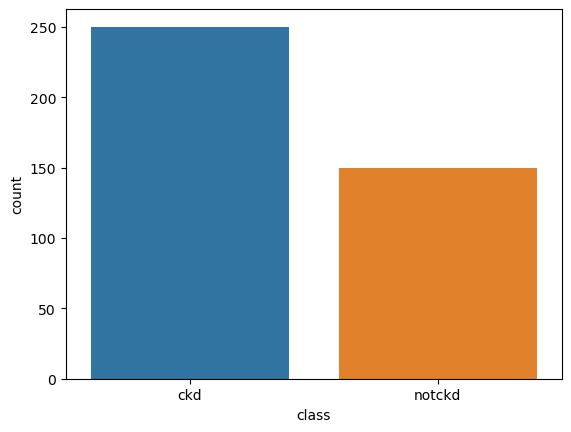

In [38]:
# Check the distribution of the 'class' variable
import seaborn as sns
sns.countplot(x='class', data=df)

In [39]:
# Check for missing values
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [40]:
# For numerical columns fill the missing values with median
for col in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns fill the missing values with the mode (most common value)
for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [44]:

# Convert categorical variables into numerical with Label Encoding or One Hot Encoding, depending on the use case
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ordinal_variables = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in ordinal_variables:
    df[col] =le.fit_transform(df[col])

# # Apply one-hot encoding for nominal variables (if any)
# nominal_variables = []  # add your nominal variables here
# df = pd.get_dummies(df, columns=nominal_variables)

In [47]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# List numerical features
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Correct skewness
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75] # Filter highly skewed features
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats]) # Apply log + 1 transformation to correct skewness

# Scale features
sc = StandardScaler()
df[numeric_feats] = sc.fit_transform(df[numeric_feats])

Modeling (cross-validation and training)

Evaluation

Explanation

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made?

Cross-validation scores: [0.984375 0.984375 0.984375 0.984375 0.921875]
Average cross-validation score: 0.97
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]
   feature  importance
14    hemo    0.697126
2       sg    0.199937
3       al    0.026045
10      bu    0.021956
17    rbcc    0.016242
9      bgr    0.015897
12     sod    0.010598
18     htn    0.008831
15     pcv    0.002426
11      sc    0.000942
22      pe    0.000000
21   appet    0.000000
20     cad    0.000000
19      dm    0.000000
16    wbcc    0.000000
0      age    0.000000
13     pot    0.000000
1       bp    0.000000
8       ba    0.000000
7      pcc    0.000000
6       pc    0.000000
5      rbc    0.000000
4       su    0.

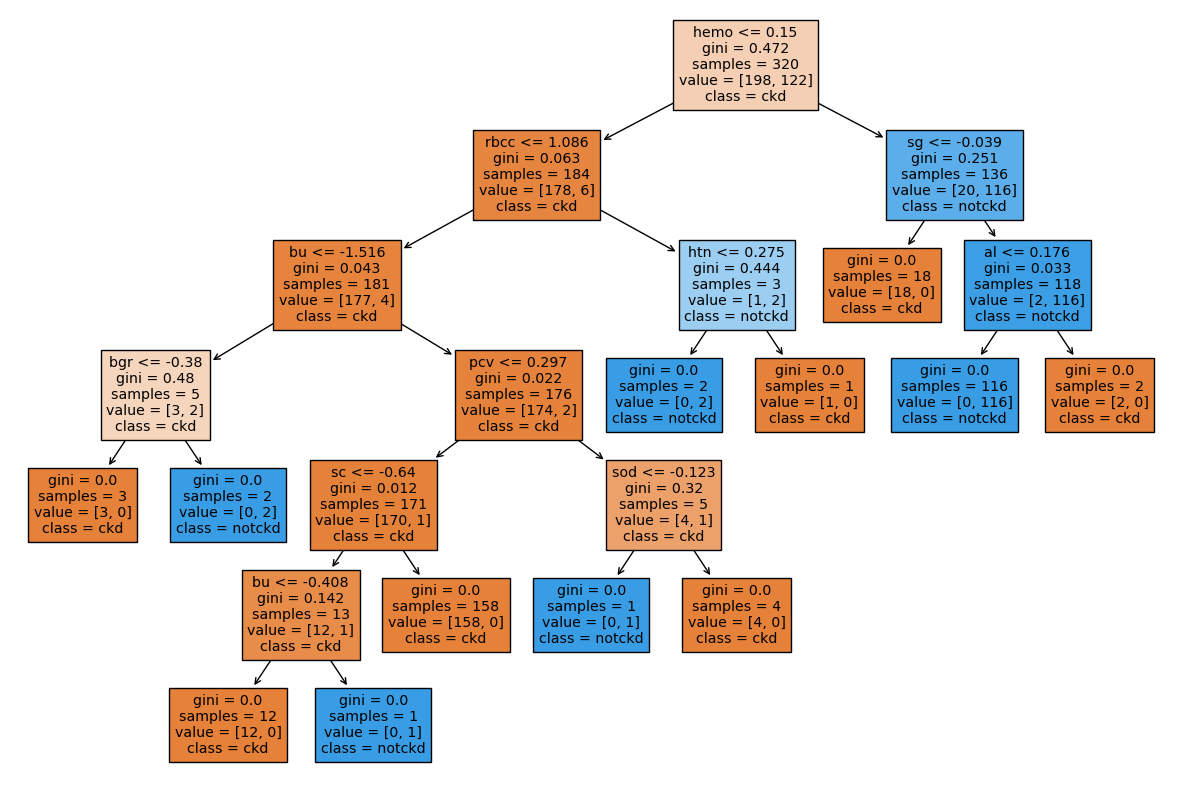

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Separate features from target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model
model = DecisionTreeClassifier()

# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

# Fit model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Display the decision tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=['ckd','notckd'],
                   filled=True)

# Feature importance
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
print(importance.sort_values('importance', ascending=False))

3. Naive Bayes

During the Corona pandemic, seven roommates in a student house did a Corona test. The table below show the data of these students: whether they experiences shivers, had a running nose, or had a headache. The test result is also shown.

 Roommate | Shivers | Running Nose | Headache | Test Result |
|---------|---------|--------------|----------|-------------|
| 1        | Y       | N            | No       | Negative    |
| 2        | N       | N            | Mild     | Negative    |
| 3        | Y       | Y            | No       | Positive    |
| 4        | N       | Y            | No       | Negative    |
| 5        | N       | N            | Heavy    | Positive    |
| 6        | Y       | N            | No       | Negative    |
| 7        | Y       | Y            | Mild     | Positive    |


1. Explain why it is not useful to include the column 'Roommate' in a classification procedure.

Train a Categorical Naive Bayes classifier on this dataset, where the Test Results are your classes and the other features the data. For this to work, you'll need Pandas get_dummies to transform the nominal data into something that sklearn can work with. Use all seven rows in your training.

If you let your fitted classifier predict the test results (based on all the data), you will (hopefully) see that the prediction for observation number 5 (1-based) is wrong (it predicts Negative while the actual value is Positive). Show by manual calculation that the prediction for this instance is indeed higher () for the Negative class than for the Positive class.

## Answer
1. Before implementing the classifier, it's important to understand why the 'Roommate' column is not included.

This is because the 'Roommate' column is just an identifier for the different roommates and not a feature that can help classify whether a person is Corona positive or not. In other words, it's independent of the output variable (Test Result). Including such a column in a machine learning model could lead to overfitting, as the model might learn to associate specific roommates with the disease status, which is not meaningful or generalizable to other data.

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

# Prepare the dataset
data = {'Roommate': [1, 2, 3, 4, 5, 6, 7],
        'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
        'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'],
        'headache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'],
        'test result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive']}

df = pd.DataFrame(data)

# drop the Roommate column
df = df.drop('Roommate', axis=1)

# Convert nominal data to numerical data with get_dummies
df = pd.get_dummies(df, drop_first=True)

# Split the dataset into features and labels
X = df.drop('test result_Positive', axis=1)
y = df['test result_Positive']

# Initialize and fit the Naive Bayes classifier
clf = CategoricalNB()
clf.fit(X, y)

# Predict the test results
print(clf.predict(X))

[0 0 0 0 0 0 1]


To manually calculate and verify the prediction for the 5th instance, we would need to calculate the conditional probability of each feature for each class (Positive and Negative), assuming that the features are independent.

If we denote P(A|B) as the probability of A given B, the Naive Bayes classifier works as follows:

P(Positive|features) = P(shivers=N|Positive) * P(running nose=N|Positive) * P(headache=Heavy|Positive) * P(Positive)

P(Negative|features) = P(shivers=N|Negative) * P(running nose=N|Negative) * P(headache=Heavy|Negative) * P(Negative)

The classifier then chooses the class with the higher probability.